In [1]:
import numpy as np
from pandas import read_csv

# from average_atom.core.average_atom_new import AverageAtom as AA
from average_atom.core.aa_types import AverageAtomFactory
from average_atom.core.misc import jacobi_relaxation, sor
from average_atom.core.grids import NonUniformGrid
from average_atom.core.physics import ThomasFermi, FermiDirac

import matplotlib.pyplot as plt

from hnc.hnc.constants import *
from hnc.hnc.misc import rs_from_n, n_from_rs

plt.rcParams.update({'font.size': 10})
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['xtick.labelsize']=8

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ModuleNotFoundError: No module named 'mendeleev'


In [40]:
# Xenon 5 bar
# name='Xe'
# Z, A = 54, 131.293

# ni_cc = 1.249e20
# ni_AU = ni_cc*invcc_to_AU
# rs = rs_from_n(ni_AU)
# R  = 10*rs

# Ti_eV = 1
# Te_eV = 1

# Argon 25 bar
name='Ar'
Pbar_initial = 25
TK_peak = 17.761029411764707e3 # 0.008097165991902834 ns?
Z, A = 18, 39.948

Te_K = TK_peak#8686.252188605766
Ti_K = Te_K

# Convert Experimental parameters
T_room_K = 290
ni_cc = Pbar_initial*bar_to_AU/(T_room_K*K_to_AU)*AU_to_invcc
ni_AU = ni_cc*invcc_to_AU
rs = rs_from_n(ni_AU)
R = 10 * rs

Te_AU = Te_K*K_to_AU
Ti_AU = Ti_K*K_to_AU

aa_ZJ  = AverageAtomFactory.create_model("ZJ_ISModel", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=False, xc_type='KSDT', Npoints=1000, rmin=1e-3, N_stencil_oneside = 2)
# aa_ZJ.vxc_f = lambda x: 0
# aa_ZJ.vxc_f = np.vectorize(aa_ZJ.vxc_f)
# self.vxc_f = self.TF.vxc_func
aa_CS  = AverageAtomFactory.create_model("TFStarret2014", Z, A, Ti_AU, Te_AU, rs, R, name=name, ignore_vxc=False, xc_type='simple', rmin=1e-4, Npoints=2000)#, grid_spacing='quadratic',N_stencil_oneside=3)

________________________
Generating NPA
T:  0.056245804882944915
Using More TF fit for initial Zstar = 0.979
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized
________________________
Generating NPA
T:  0.056245804882944915


/home/zach/plasma/average_atom/core/average_atom_new.py:236: RuntimeWarning: invalid value encountered in power
  nb_Mavrin_Demura_func = lambda r: np.nan_to_num(self.Z/(4*π*r_TF**3) * (Φ_Mavrin_Demura(x(r))/x(r) )**1.5)


Using More TF fit for initial Zstar = 0.979
	Intializing grid
Initializing, False
________________________
Generating NPA
T:  0.056245804882944915
Using More TF fit for initial Zstar = 0.979
	Intializing grid
Initializing, True
Initializing
	Creating Integral Equation Solver
Intialized Potentials and Densities
Initialized


In [41]:
aa_ZJ.solve(nmax=1000, verbose=True, picard_alpha=0.2)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	μ = -2.081462267e+00, change: 1.171653864e+01 (converged=False)
	φe Err =  5.851e-12, φe change =  9.796e-01
	ne Err =  1.155e-01, ne change =  9.321e-04
	Q =  0.000e+00 -> -3.118e+01, 
	Zstar guess =  9.786e-01. Current Zstar:  9.786e-01 (converged=True)
	Change =  1.893e+00
__________________________________________
TF Iteration 1
	μ = -2.081462267e+00, change: 0.000000000e+00 (converged=True)
	φe Err =  6.098e-12, φe change =  7.842e-02
	ne Err =  2.044e-01, ne change =  5.832e-04
	Q = -3.118e+01 -> -2.273e+01, 
	Zstar guess =  9.786e-01. Current Zstar:  9.786e-01 (converged=True)
	Change =  9.014e-02
__________________________________________
TF Iteration 2
	μ = -2.081462267e+00, change: 0.000000000e+00 (converged=True)
	φe Err =  6.140e-12, φe change =  1.692e-02
	ne Err =  1.476e-01, ne change =  4.955e-04
	Q = -2.273e+01 -> -1.612e+01, 
	Zstar g

In [42]:
# aa_CS.solve(verbose=True, picard_alpha=0.2)

In [43]:
# aa_ZJ.vxc_f = lambda x: 0
# aa_ZJ.vxc_f = np.vectorize(aa_ZJ.vxc_f)

In [44]:
# aa_ZJ.vxc_f = aa_ZJ.TF.vxc_func

/tmp/ipykernel_1037670/1988131877.py:9: RuntimeWarning: overflow encountered in exp
  ax.plot(aa_ZJ.grid.xs, factor * (np.sqrt(2)/np.pi**2)*aa_ZJ.Te**(3/2)* np.sqrt(π)/2 * np.exp(η),'-')
/home/zach/anaconda3/envs/zplasma/lib/python3.10/site-packages/matplotlib/scale.py:368: RuntimeWarning: overflow encountered in divide
  np.log(abs_a / self.linthresh) / self._log_base)


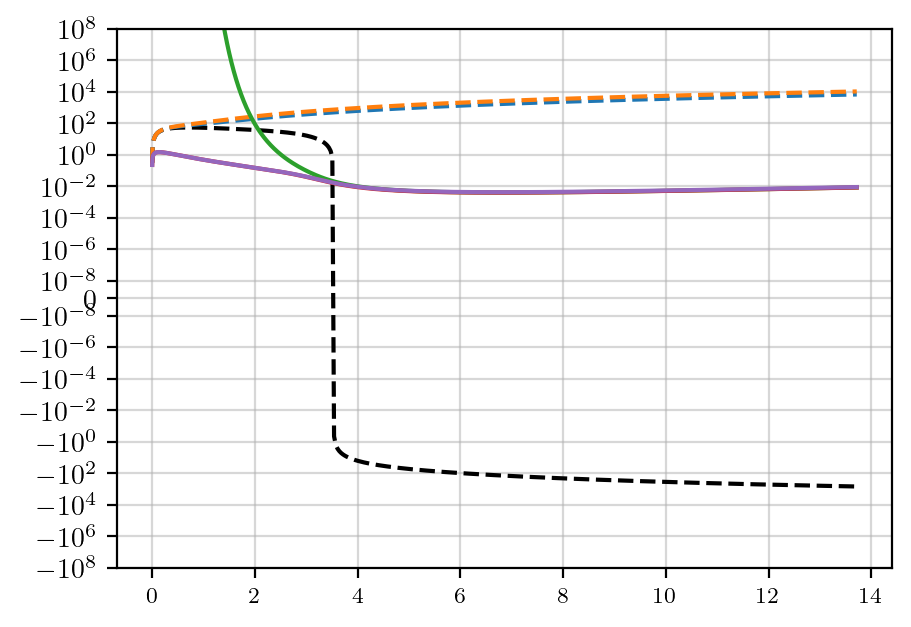

In [49]:
fig, ax = plt.subplots()


factor = aa_ZJ.grid.xs**2
η = aa_ZJ.get_eta_from_sum(aa_ZJ.φe, aa_ZJ.ne, aa_ZJ.μ, aa_ZJ.ne_bar)
ax.plot(aa_ZJ.grid.xs, factor * η,'k--')
ax.plot(aa_ZJ.grid.xs, factor * (η+40),'--')
ax.plot(aa_ZJ.grid.xs, factor * (η+60),'--')
ax.plot(aa_ZJ.grid.xs, factor * (np.sqrt(2)/np.pi**2)*aa_ZJ.Te**(3/2)* np.sqrt(π)/2 * np.exp(η),'-')
ax.plot(aa_ZJ.grid.xs, factor * aa_ZJ.get_ne_TF(aa_ZJ.φe, aa_ZJ.ne, aa_ZJ.μ, aa_ZJ.ne_bar),'-')
ax.plot(aa_ZJ.grid.xs, factor * aa_ZJ.ne,'-')

ax.set_yscale('symlog', linthresh=1e-8)
# ax.set_xlim(3,5)

ax.set_ylim(-1e8,1e8)
ax.grid(which='both', alpha=0.5)
# ax.set_xscale('log')

(<Figure size 4000x1600 with 2 Axes>,
 array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$\\phi$ [A.U.]'>,
        <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$n$ [A.U.]'>],
       dtype=object))

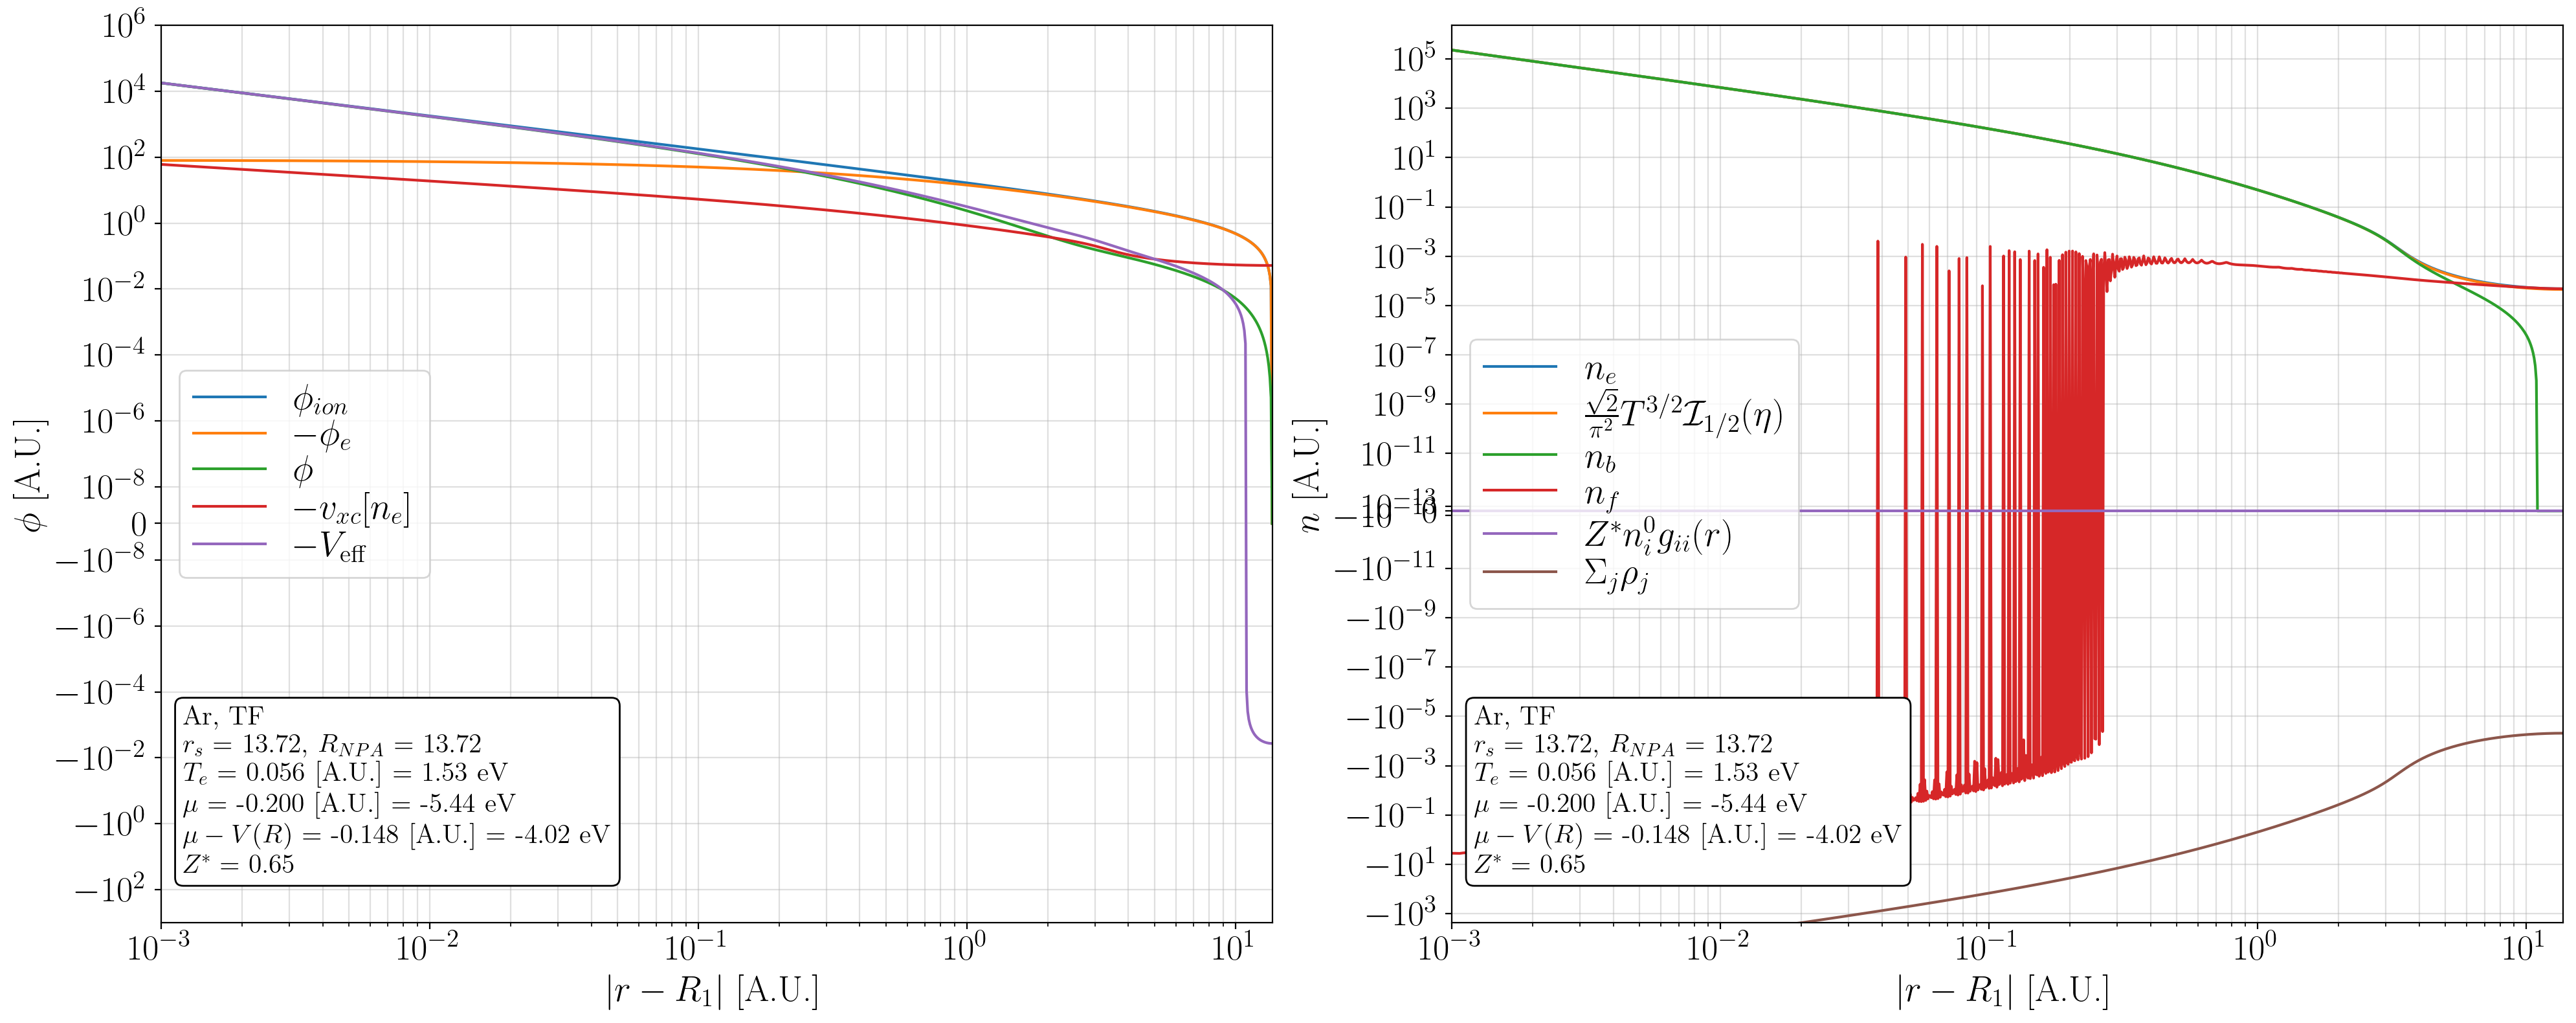

In [50]:
# aa_CS.core_atom.ne_bar = 1e-12
# aa_CS.core_atom.make_plots()
aa_ZJ.make_bound_free()
aa_ZJ.make_plots()


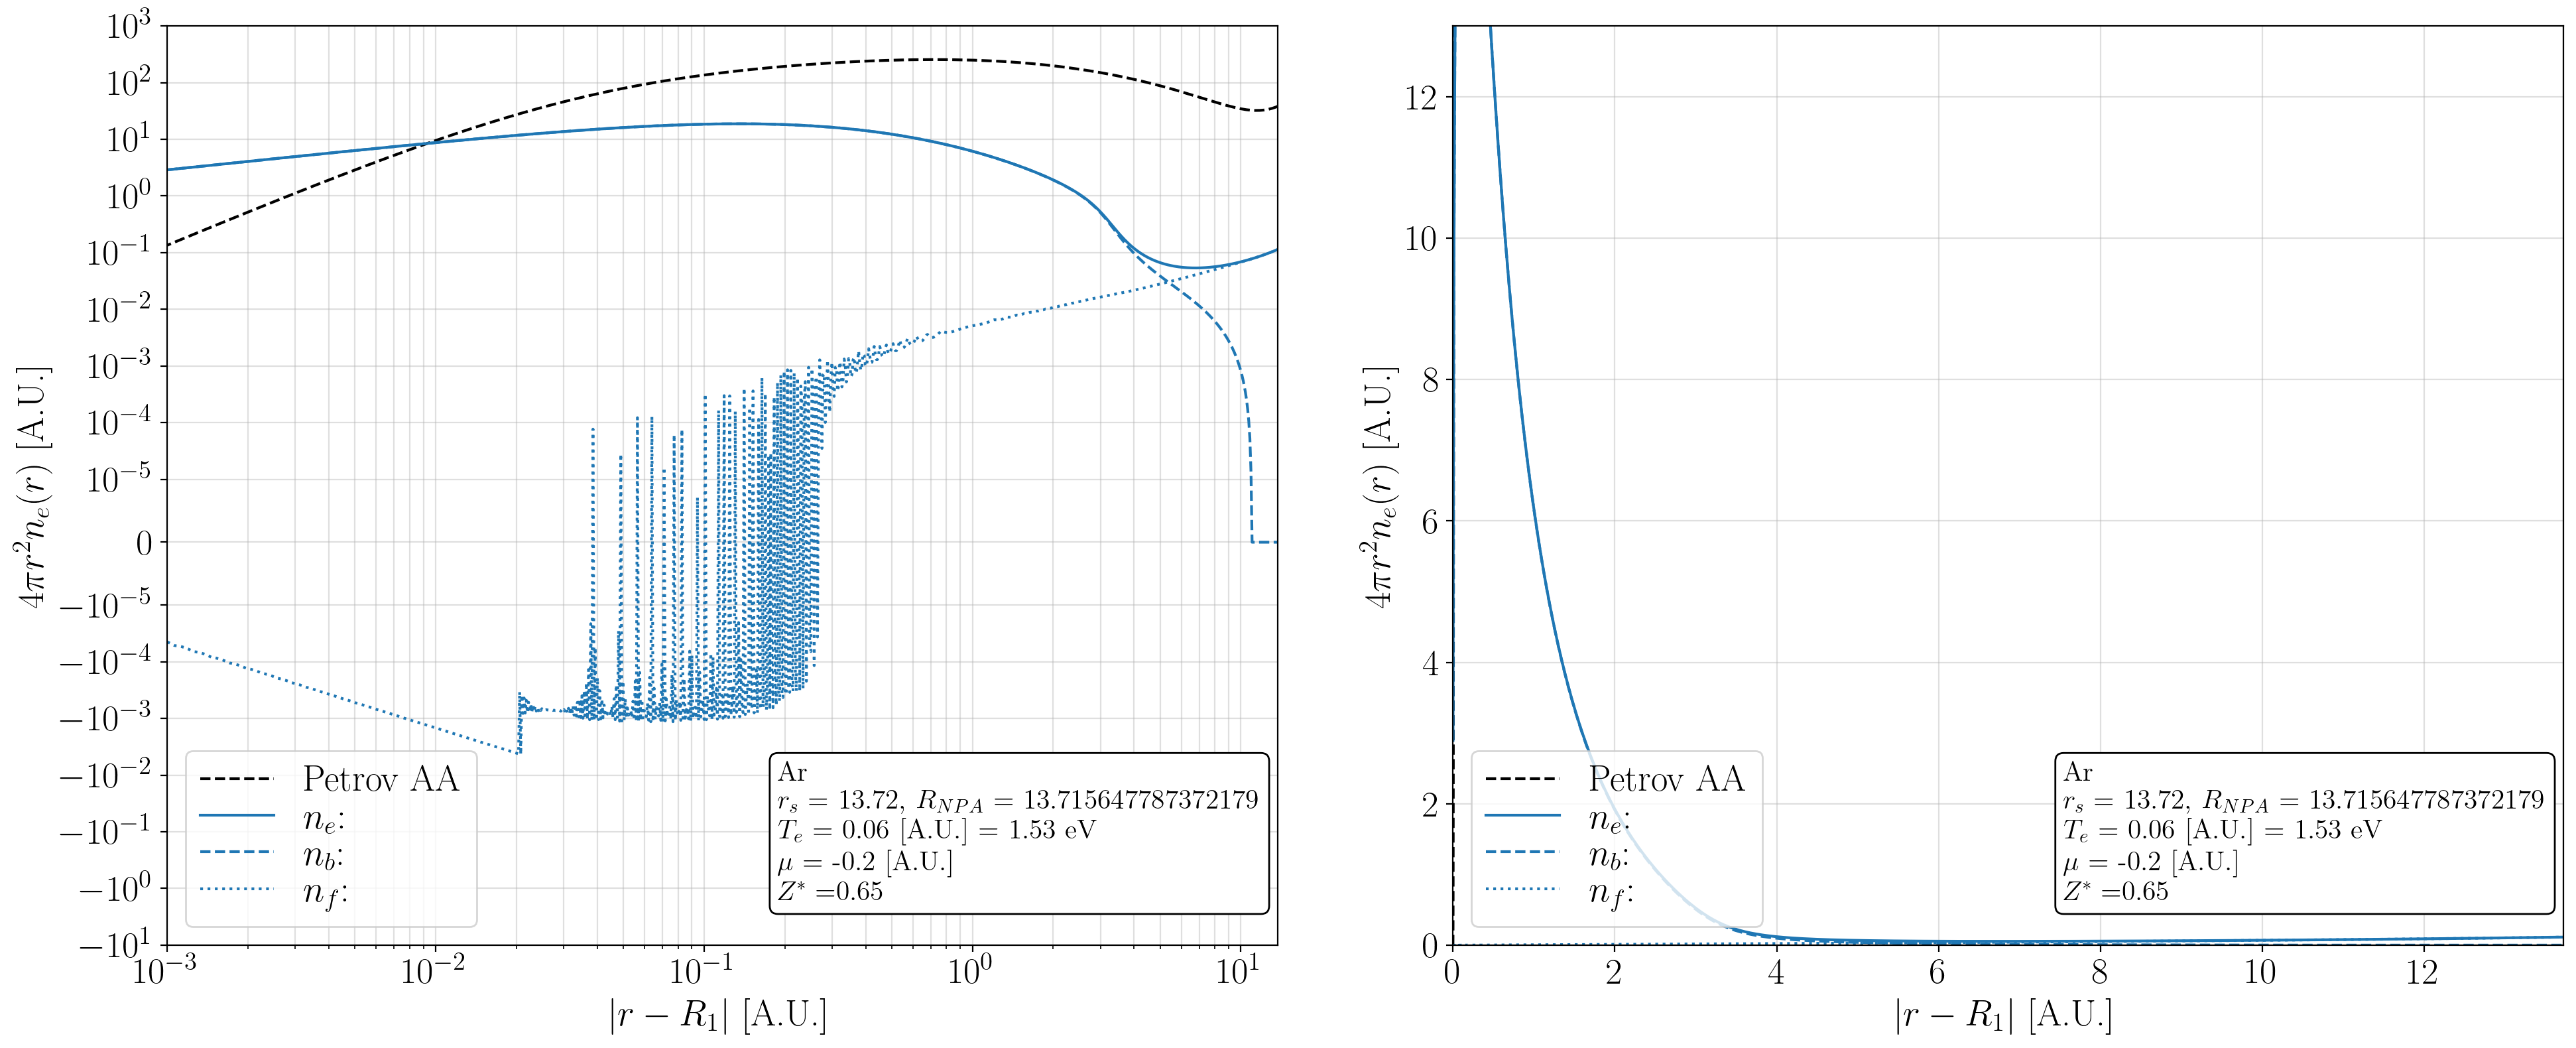

In [51]:
from importlib import reload
try:
    reload(plotting)
except NameError as e:
    from average_atom.core import plotting as plotting
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)
    
from average_atom.core.plotting import compare_aa, plot_convergence, plot_Uei, plot_Uii, plot_hii
# fig, axs = plot_Uei([aa_CS, aa_ZJ])
# fig, axs = plot_Uii([aa_CS, aa_ZJ])
# fig, axs = plot_hii([aa_CS, aa_ZJ])
# fig, axs = plot_Uei([ aa_ZJ])
# fig, axs = plot_Uii([ aa_ZJ])
# fig, axs = plot_hii([ aa_ZJ])
fig, axs = compare_aa([aa_ZJ])
# fig, axs = plot_convergence(aa_ZJ)


### EOS

In [52]:
def get_E(aa):
    βVeff = aa.get_βVeff(aa.φe, aa.ne, aa.ne_bar)
    η = aa.μ/aa.Te - βVeff
    βU = aa.grid.integrate_f(βVeff*aa.ne)
    
    φ_from_e_only = aa.get_φe(-aa.ne)[0] 
    φ_from_i_only = aa.get_φe(aa.ρi)[0] + aa.φion 
    U = -aa.grid.integrate_f(aa.ne * (0.5*φ_from_e_only + φ_from_i_only))

    I_onehalf = FermiDirac.Ionehalf(η)
    I_threehalf = FermiDirac.Ithreehalf(η)
    
    K = (2*aa.Te)**1.5/(2*π**2) * aa.Te * aa.grid.integrate_f( I_threehalf)
    return U, K, (U + K)

def get_P(aa):
    P = (2*aa.Te)**2.5/(6*π**2) * FermiDirac.Ithreehalf(aa.μ/aa.Te)
    return P

def print_EOS(aa):
    Ee_pot, Ee_K, Ee = get_E(aa)
    P_e =  get_P(aa)
    print(f"Ee_pot_density = {Ee_pot*aa.ni_bar:0.3e} [au], Ee_K = {Ee_K*aa.ni_bar:0.3e} [au], Ee_tot = {Ee*aa.ni_bar:0.3e} [au]")
    print(f"P_e = {P_e:0.3e} [au], {P_e*AU_to_bar/1e6:0.3e} [Mbar]")
    print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa.Vol - 0.5*Ee_pot:0.3e} --->  off by {100*Ee_K/(3/2*P_e*aa.Vol - 0.5*Ee_pot) - 100:0.3e} % ")
    
    print(f"\nβEe_pot/Z = {Ee_pot/aa.Te/aa.Z:0.3f}, βEe_K/Z = {Ee_K/aa.Te/aa.Z:0.3f}, βEe_tot/Z = {Ee/aa.Te/aa.Z:0.3f}")
    print(f"βP_e Ω/Z = {P_e*aa.Vol/aa.Te/aa.Z:0.3f}")
    # print(f"Virial if {Ee_K:0.3e} = {3/2*P_e*aa.Vol - 0.5*Ee_pot:0.3e}")

print_EOS(aa_ZJ)

Ee_pot_density = -1.126e-01 [au], Ee_K = 5.723e-02 [au], Ee_tot = -5.539e-02 [au]
P_e = 2.718e-06 [au], 7.998e-04 [Mbar]
Virial if 6.185e+02 = 6.086e+02 --->  off by 1.630e+00 % 

βEe_pot/Z = -1202.222, βEe_K/Z = 610.954, βEe_tot/Z = -591.269
βP_e Ω/Z = 0.029


/home/zach/plasma/average_atom/core/average_atom_new.py:476: RuntimeWarning: divide by zero encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])
/home/zach/plasma/average_atom/core/average_atom_new.py:476: RuntimeWarning: invalid value encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])
